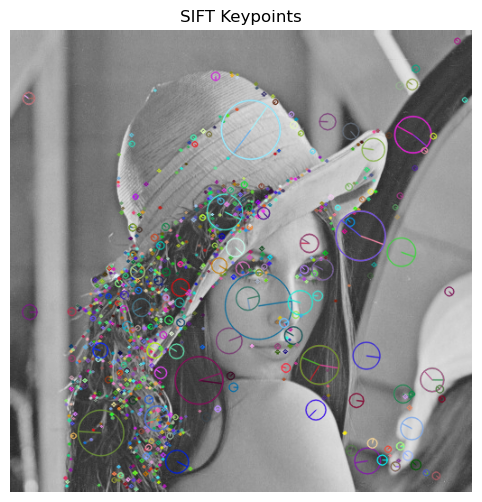

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_sift(image_path):
    """
    Performs SIFT feature detection and displays the image with keypoints using Matplotlib.
    
    :param image_path: Path to the input image.
    """
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Could not load image. Check the file path.")

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Draw keypoints on the image
    sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the image with keypoints using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(sift_image, cmap="gray")
    plt.axis("off")  # Hide axis
    plt.title("SIFT Keypoints")
    plt.show()

    return keypoints, descriptors

# Example usage:
keypoints, descriptors = perform_sift(r"D:\Sample-image-Lena-image-size-512-512-pixels-clustered-by-the-original-SLIC-middle.png")


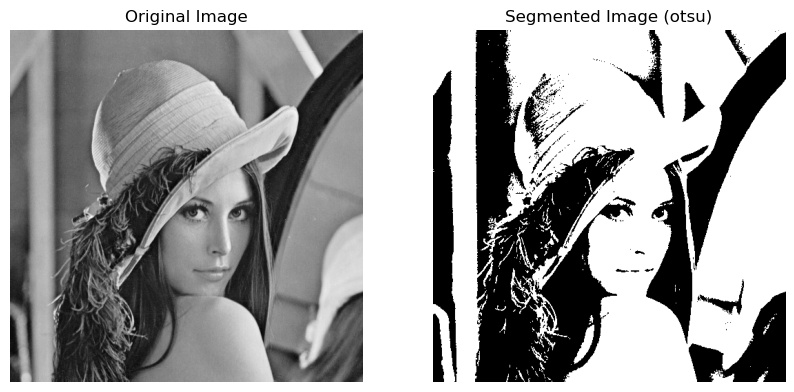

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image_threshold(image_path, threshold_value=127, method="binary"):
    """
    Performs image segmentation using thresholding and displays the results.
    
    :param image_path: Path to the input image.
    :param threshold_value: Threshold value (0-255).
    :param method: Thresholding method ('binary', 'otsu', 'adaptive').
    :return: Segmented image.
    """
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Could not load image. Check the file path.")

    # Apply thresholding
    if method == "binary":
        _, segmented = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    elif method == "otsu":
        _, segmented = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif method == "adaptive":
        segmented = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    else:
        raise ValueError("Invalid thresholding method. Choose 'binary', 'otsu', or 'adaptive'.")

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap="gray")
    plt.title(f"Segmented Image ({method})")
    plt.axis("off")

    plt.show()

    return segmented

segment_image_threshold(r"D:\Sample-image-Lena-image-size-512-512-pixels-clustered-by-the-original-SLIC-middle.png", method="otsu")


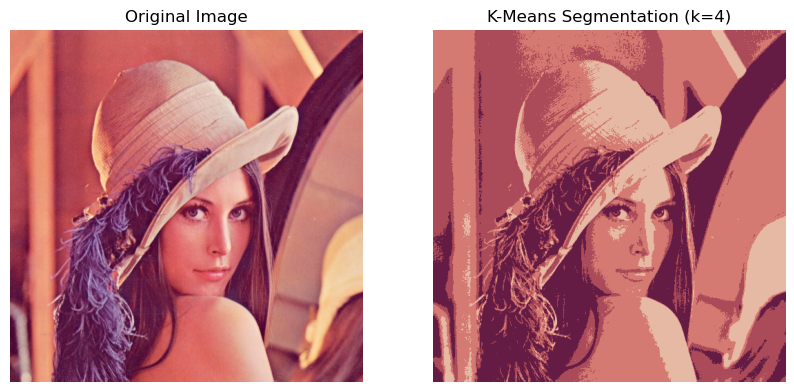

array([[[212, 122, 114],
        [212, 122, 114],
        [212, 122, 114],
        ...,
        [212, 122, 114],
        [212, 122, 114],
        [212, 122, 114]],

       [[212, 122, 114],
        [212, 122, 114],
        [212, 122, 114],
        ...,
        [212, 122, 114],
        [212, 122, 114],
        [171,  74,  88]],

       [[212, 122, 114],
        [212, 122, 114],
        [212, 122, 114],
        ...,
        [212, 122, 114],
        [212, 122, 114],
        [171,  74,  88]],

       ...,

       [[100,  28,  68],
        [100,  28,  68],
        [100,  28,  68],
        ...,
        [171,  74,  88],
        [171,  74,  88],
        [171,  74,  88]],

       [[100,  28,  68],
        [100,  28,  68],
        [100,  28,  68],
        ...,
        [171,  74,  88],
        [171,  74,  88],
        [171,  74,  88]],

       [[100,  28,  68],
        [100,  28,  68],
        [100,  28,  68],
        ...,
        [171,  74,  88],
        [171,  74,  88],
        [171,  74,  88]]

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image_kmeans(image_path, k=3, max_iter=100, epsilon=0.2):
    """
    Performs image segmentation using K-Means clustering.

    :param image_path: Path to the input image.
    :param k: Number of clusters (segments).
    :param max_iter: Maximum number of iterations for K-Means.
    :param epsilon: Convergence criteria for K-Means.
    :return: Segmented image.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not load image. Check the file path.")

    # Convert to RGB (for Matplotlib visualization)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels (num_pixels x 3)
    pixel_values = image_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define K-Means criteria and apply clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert cluster centers to uint8 (color values)
    centers = np.uint8(centers)

    # Map each pixel to its corresponding cluster center
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_rgb.shape)

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"K-Means Segmentation (k={k})")
    plt.axis("off")

    plt.show()

    return segmented_image

# Example usage:
segment_image_kmeans(r"D:\Sample-image-Lena-image-size-512-512-pixels-clustered-by-the-original-SLIC-middle.png", k=4)


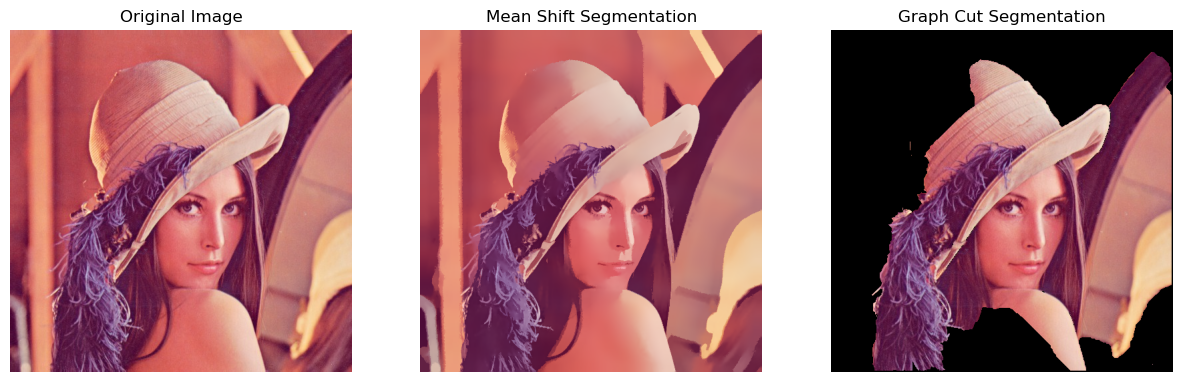

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mean_shift_segmentation(image, spatial_radius=10, color_radius=30, max_pyramid_level=1):
    # Apply mean shift filtering
    segmented_image = cv2.pyrMeanShiftFiltering(image, sp=spatial_radius, sr=color_radius, maxLevel=max_pyramid_level)
    return segmented_image

def graph_cut_segmentation(image, rect=(10, 10, 500, 500), iter_count=10):
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Apply GrabCut algorithm
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=iter_count, mode=cv2.GC_INIT_WITH_RECT)

    # Modify mask
    mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented_image = image * mask_final[:, :, np.newaxis]

    return segmented_image


def display_results(image_path):
    # Read input image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform Mean Shift Segmentation
    mean_shift_result = mean_shift_segmentation(image)
    
    # Perform Graph Cut Segmentation
    graph_cut_result = graph_cut_segmentation(image)
    
    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    axes[1].imshow(mean_shift_result)
    axes[1].set_title("Mean Shift Segmentation")
    axes[1].axis("off")
    
    axes[2].imshow(graph_cut_result)
    axes[2].set_title("Graph Cut Segmentation")
    axes[2].axis("off")
    
    plt.show()

# Example Usage
display_results(r"D:\Sample-image-Lena-image-size-512-512-pixels-clustered-by-the-original-SLIC-middle.png")

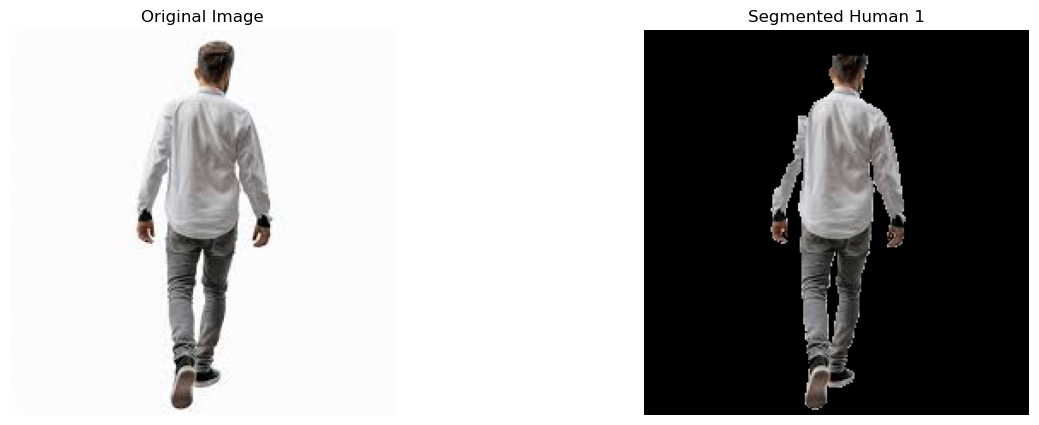

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8)]

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_humans(image):
    # Initialize HOG descriptor for human detection
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect humans in the image
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    boxes, _ = hog.detectMultiScale(gray, winStride=(8, 8), padding=(8, 8), scale=1.05)

    return boxes

def graph_cut_human_segmentation(image_path, iter_count=10):
    # Read and convert the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect humans
    human_boxes = detect_humans(image)

    if len(human_boxes) == 0:
        print("No humans detected in the image.")
        return None

    # Create an empty mask
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Iterate over detected humans and apply Graph Cut
    segmented_images = []
    for (x, y, w, h) in human_boxes:
        rect = (x, y, w, h)
        cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=iter_count, mode=cv2.GC_INIT_WITH_RECT)

        # Create a mask where the foreground is 1 and background is 0
        mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        segmented_image = image * mask_final[:, :, np.newaxis]
        segmented_images.append(segmented_image)

    # Display Results
    fig, axes = plt.subplots(1, len(segmented_images) + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    for i, seg_img in enumerate(segmented_images):
        axes[i + 1].imshow(seg_img)
        axes[i + 1].set_title(f"Segmented Human {i + 1}")
        axes[i + 1].axis("off")

    plt.show()

    return segmented_images

# Example Usage:
graph_cut_human_segmentation(r"D:\images (5).jpg")


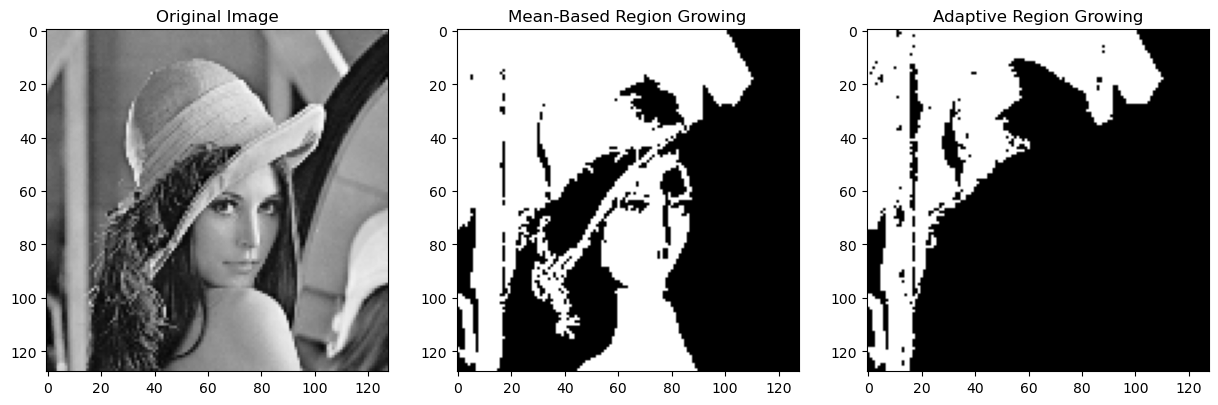

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mean_based_region_growing(image, seed_point, threshold=10):
    """
    Performs mean-based region growing.

    Parameters:
    - image: Input grayscale image.
    - seed_point: Tuple (x, y) specifying the seed pixel.
    - threshold: Intensity difference threshold.

    Returns:
    - region_mask: Binary mask of the grown region.
    """

    h, w = image.shape
    region_mask = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=np.uint8)
    
    # Initialize region with the seed
    seed_x, seed_y = seed_point
    region_pixels = [(seed_x, seed_y)]
    region_intensity = [image[seed_y, seed_x]]
    region_mask[seed_y, seed_x] = 255
    visited[seed_y, seed_x] = 1

    while region_pixels:
        x, y = region_pixels.pop(0)
        mean_intensity = np.mean(region_intensity)

        # 4-connectivity neighbors
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        
        for nx, ny in neighbors:
            if 0 <= nx < w and 0 <= ny < h and visited[ny, nx] == 0:
                intensity = image[ny, nx]
                
                if abs(intensity - mean_intensity) < threshold:
                    region_pixels.append((nx, ny))
                    region_mask[ny, nx] = 255
                    visited[ny, nx] = 1
                    region_intensity.append(intensity)

    return region_mask


def adaptive_region_growing(image, seed_point, base_threshold=10, std_factor=5):
    """
    Performs adaptive region growing with a dynamically changing threshold.

    Parameters:
    - image: Input grayscale image.
    - seed_point: Tuple (x, y) specifying the seed pixel.
    - base_threshold: Initial intensity difference threshold.
    - std_factor: Factor to control adaptiveness using standard deviation.

    Returns:
    - region_mask: Binary mask of the grown region.
    """

    h, w = image.shape
    region_mask = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=np.uint8)
    
    # Initialize region with the seed
    seed_x, seed_y = seed_point
    region_pixels = [(seed_x, seed_y)]
    region_intensity = [image[seed_y, seed_x]]
    region_mask[seed_y, seed_x] = 255
    visited[seed_y, seed_x] = 1

    while region_pixels:
        x, y = region_pixels.pop(0)
        mean_intensity = np.mean(region_intensity)
        std_dev = np.std(region_intensity) if len(region_intensity) > 1 else 0
        adaptive_threshold = base_threshold + std_factor * std_dev

        # 4-connectivity neighbors
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        
        for nx, ny in neighbors:
            if 0 <= nx < w and 0 <= ny < h and visited[ny, nx] == 0:
                intensity = image[ny, nx]
                
                if abs(intensity - mean_intensity) < adaptive_threshold:
                    region_pixels.append((nx, ny))
                    region_mask[ny, nx] = 255
                    visited[ny, nx] = 1
                    region_intensity.append(intensity)

    return region_mask


# Example usage
image = cv2.imread(r"D:\Sample-image-Lena-image-size-512-512-pixels-clustered-by-the-original-SLIC-middle.png", cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(128,128))
seed = (50, 20)  # Example seed point

region_mask_fixed = mean_based_region_growing(image, seed, threshold=50)
region_mask_adaptive = adaptive_region_growing(image, seed, base_threshold=4, std_factor=2)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(region_mask_fixed, cmap="gray")
ax[1].set_title("Mean-Based Region Growing")
ax[2].imshow(region_mask_adaptive, cmap="gray")
ax[2].set_title("Adaptive Region Growing")

plt.show()
